The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. 

![titanic/info.png](titanic/info.png)

# Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Part1: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matploblib inline


UsageError: Line magic function `%matploblib` not found.


In [2]:
data = pd.read_csv("titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

How many Survived?

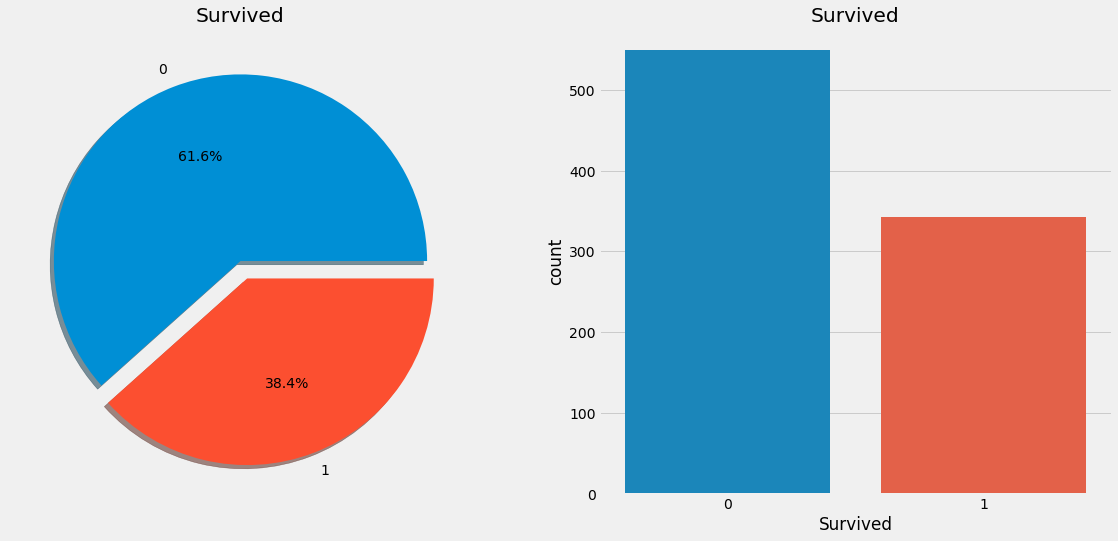

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')
sns.countplot(x=data["Survived"],ax=ax[1])
ax[1].set_title("Survived")
plt.show()



It is evident that not many passengers survived the accident. 

Out of 891 passengers in training set, only around 350 survived i.e Only **38.4%** of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

## Analysing the Features

### Sex --> Categorical Feature

In [28]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

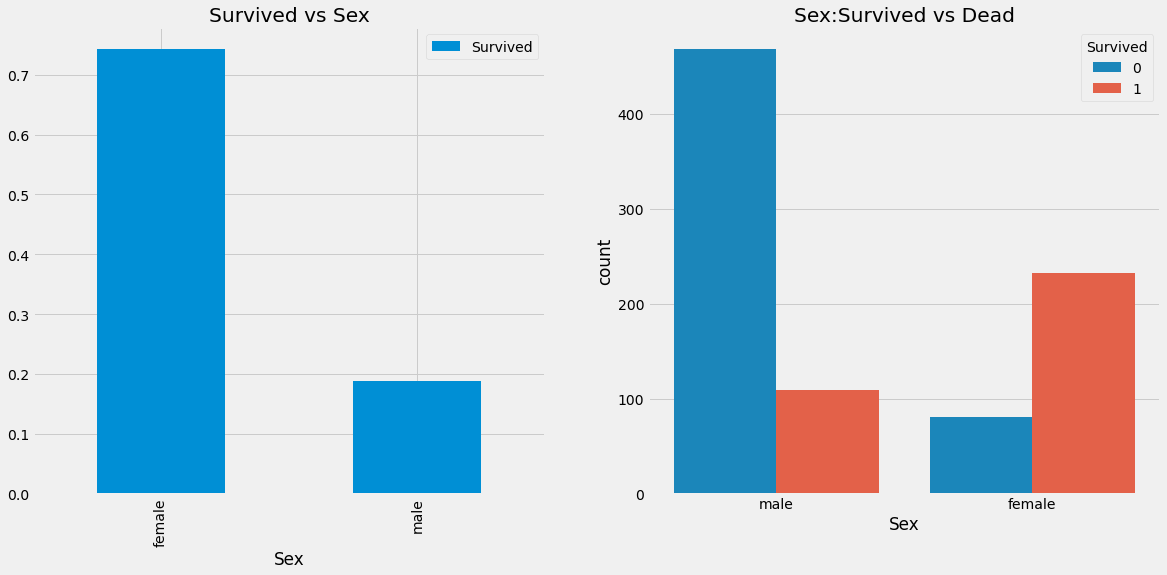

In [37]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best??   Lets check other features.

## Pclass --> Ordinal Feature

In [38]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [50]:
round(data[data['Pclass']==1]['Survived'].value_counts()/len(data[data['Pclass']==1])*100,2)

1    62.96
0    37.04
Name: Survived, dtype: float64

In [51]:
round(data[data['Pclass']==2]['Survived'].value_counts()/len(data[data['Pclass']==2])*100,2)

0    52.72
1    47.28
Name: Survived, dtype: float64

In [52]:
round(data[data['Pclass']==3]['Survived'].value_counts()/len(data[data['Pclass']==3])*100,2)

0    75.76
1    24.24
Name: Survived, dtype: float64

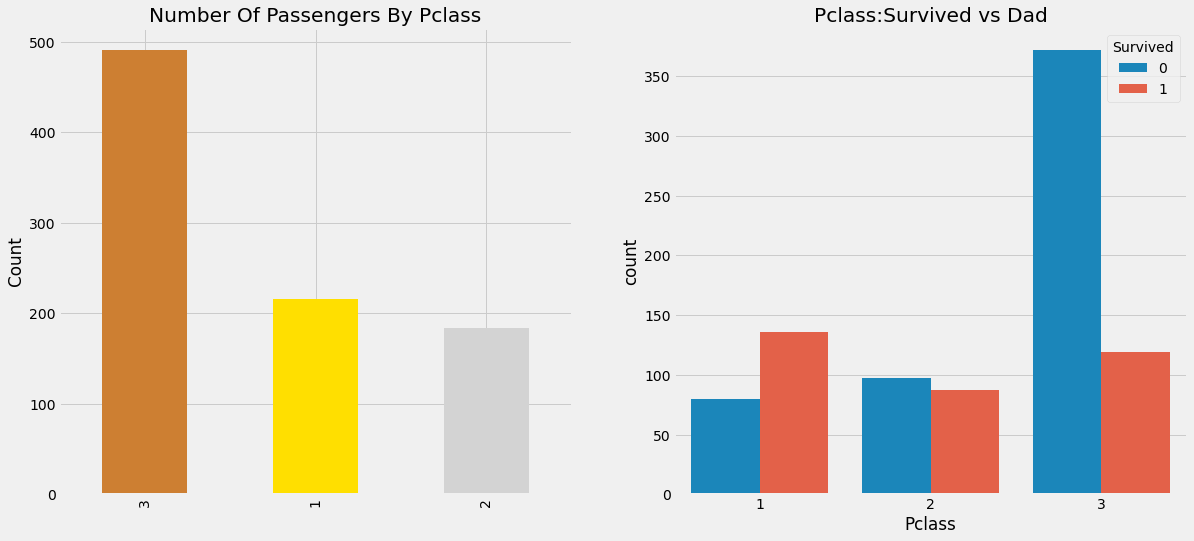

In [59]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dad')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [61]:
pd.crosstab([data.Sex,data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

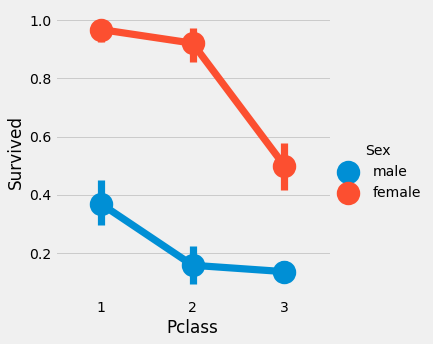

In [66]:
sns.catplot(data=data,x='Pclass',y='Survived',hue='Sex',kind='point')
plt.show()

### Age --> Continuos Feature 

In [67]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [71]:
pd.crosstab([data.Age,data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

ValueError: Could not interpret input 'Age'

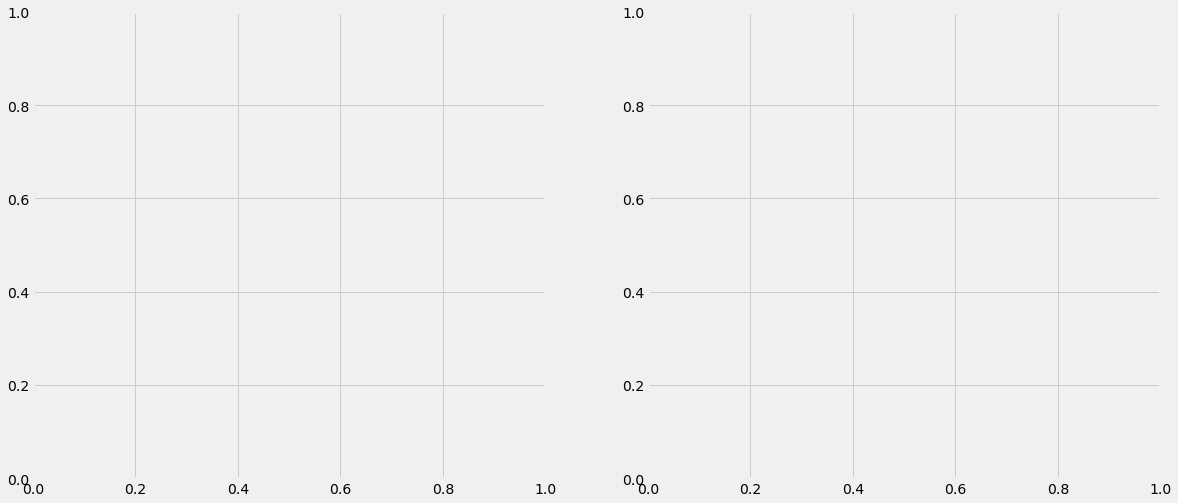

In [70]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data,x='Pclass',y='Age',hue='Survived',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data,x='Sex',y='Age',hue='Survived',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1]/set_yticks(range(0,110,10))
plt.show()